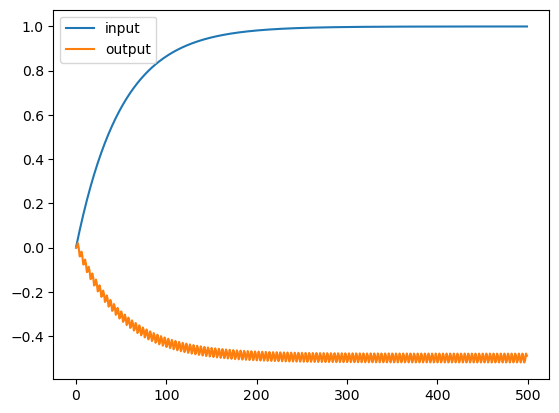

In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


class System:
    
    def __init__(self, A, x0, b, c, d, dt=1.0) -> None:
        self._A = np.copy(A)
        self._x0 = np.copy(x0)
        self._b = np.copy(b)
        self._c = np.copy(c)
        self._d = d
        self._xk = np.copy(x0)
        self._dt = dt

    def propagate(self, uk):
        self._xk = self._A @ self._xk + self._b * uk

    def output(self, uk):
        return np.dot(self._c, self._xk) + self._d * uk
    


N = 100
k = np.arange(0, N, 1)
A = np.array([[0,-1], [1,0]])
b = np.array([1,2])
c = np.array([1, 0])
d = 0.0

t = np.linspace(0, 10, 500)
u = (1 - np.exp(-t)) * np.heaviside(t, 0.0)

sys = System(A, np.zeros(2), b, c, d)
output = np.zeros_like(u)

for k, uk in enumerate(u):
    output[k] = sys.output(uk)
    sys.propagate(uk)

plt.plot(u, label='input')
plt.plot(output, label='output')
plt.legend()

plt.show()